<a href="https://colab.research.google.com/github/Suryanshagarwal30/Deeplearning_lab/blob/main/Suryansh_agarwal_NLP_Lab_Assignmnent_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -NLP

**Course Name:** [Deep Learning]

**Lab Title:** NLP Techniques for Text Classification

**Student Name:**[Suryansh agarwal]

**Student ID:**[Enter Your ID]

**Date of Submission:** [19/4/25]

**Group Members**: [Hitarth paliwal]


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
pip install pandas scikit-learn nltk


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Load dataset
df = pd.read_csv('/content/IMDB Dataset.csv')  # Make sure the file is in the same directory

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing (for demo, use first 100 rows for speed)
df_sample = df.head(100)
df_sample['processed_review'] = df_sample['review'].apply(preprocess)

# Vectorization: CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df_sample['processed_review'])

# Vectorization: TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample['processed_review'])

# Print shapes of the matrices
print("CountVectorizer Matrix Shape:", count_matrix.shape)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


CountVectorizer Matrix Shape: (100, 3928)
TF-IDF Matrix Shape: (100, 3928)


<ipython-input-5-215032b8892f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['processed_review'] = df_sample['review'].apply(preprocess)


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.8922
Precision: 0.8822621115614746
Recall: 0.9071244294502877
F1 Score: 0.8945205479452055

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



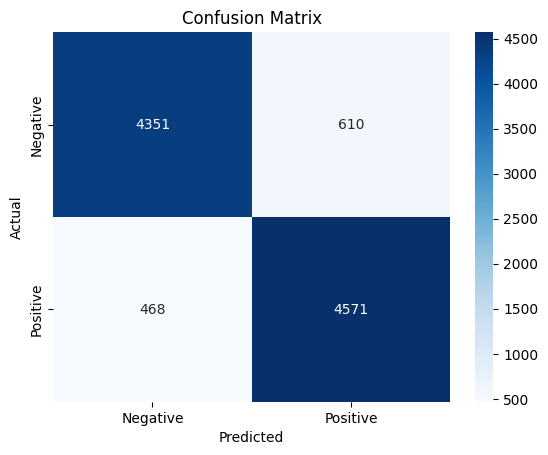

In [ ]:
#code for Part 2
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Load dataset
df = pd.read_csv('/content/IMDB Dataset.csv')  # Ensure the file is in the same directory

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert sentiment to binary

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Suryansh agarwal, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:
Signature: Suryansh agarwal

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion